In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import joblib

# Show plots inside notebook
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\CSE(DataScience)\Customer_Churn_Prediction\Datasets\Telco-Customer-Churn-dataset.csv")


# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (handle blanks as NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges (if any) with 0
df["TotalCharges"] = df["TotalCharges"].fillna(0)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Check info
df.info()

# Quick stats
df.describe(include="all").T.head(10)

Shape: (7043, 20)

Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

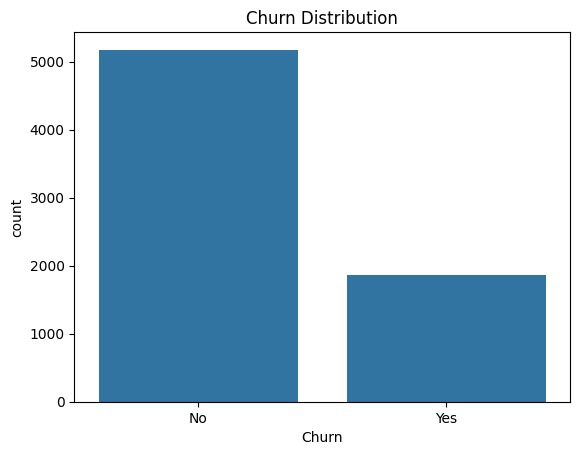

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [5]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

print(df["Churn"].value_counts(normalize=True))

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.drop("customerID", axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

In [24]:
print(df.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Churn":  # target encoded separately
        df[col] = le.fit_transform(df[col].astype(str))

# Encode target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [10]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (7043, 19)
Target shape: (7043,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("🔹 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [14]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Report")
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [15]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("🔹 XGBoost Report")
print(classification_report(y_test, y_pred_xgb))

C:\Users\dhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



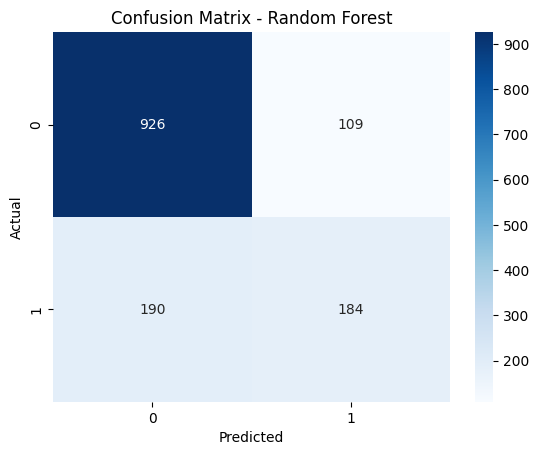

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [17]:
joblib.dump(rf, "churn_model.pkl")
print("✅ Random Forest Model saved as churn_model.pkl")

✅ Random Forest Model saved as churn_model.pkl


C:\Users\dhana\AppData\Local\Temp\ipykernel_19024\1677939177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


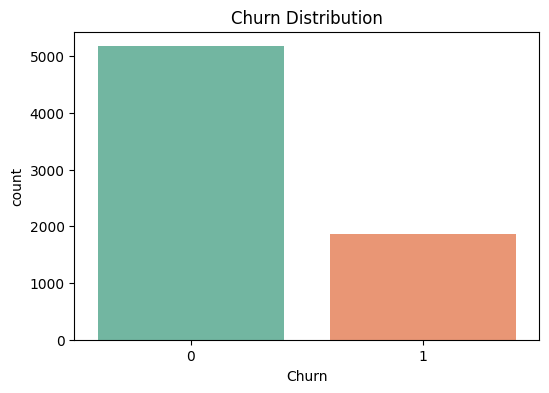

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

print(df["Churn"].value_counts(normalize=True))

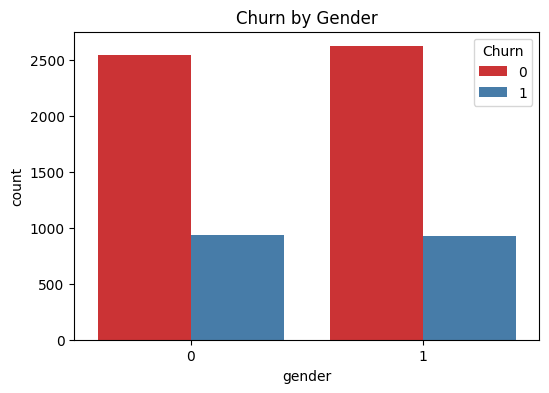

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df, palette="Set1")
plt.title("Churn by Gender")
plt.show()

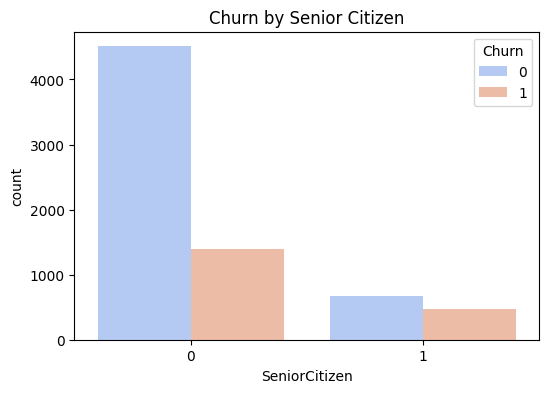

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Senior Citizen")
plt.show()

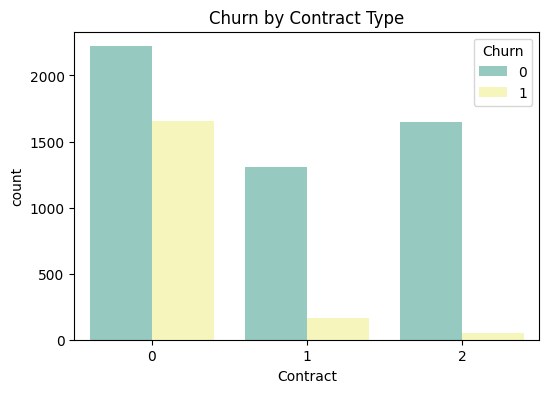

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set3")
plt.title("Churn by Contract Type")
plt.show()

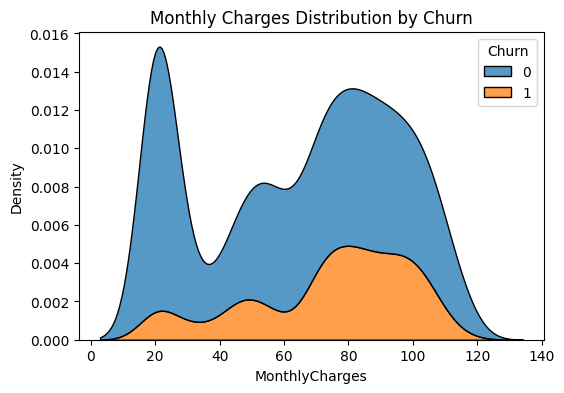

In [22]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack")
plt.title("Monthly Charges Distribution by Churn")
plt.show()

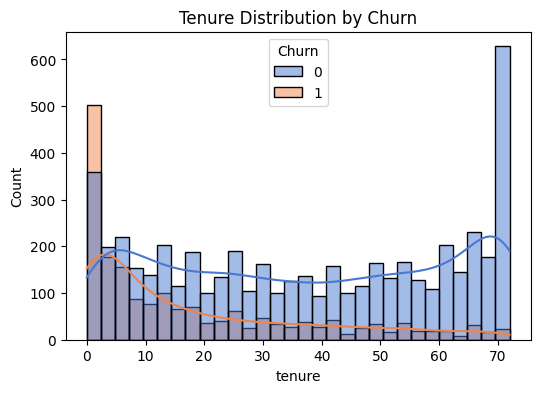

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, palette="muted")
plt.title("Tenure Distribution by Churn")
plt.show()

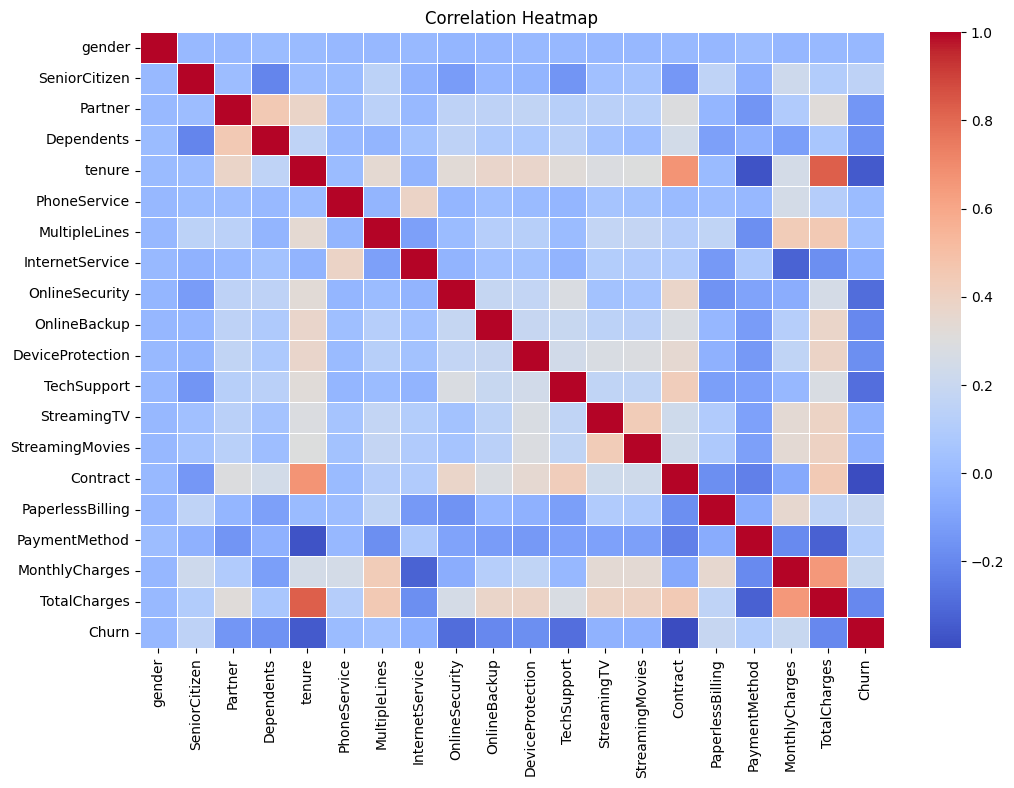

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
import joblib
import os

# Create folder for models if not exists
os.makedirs("models", exist_ok=True)

# 1) Save the trained Random Forest model
joblib.dump(rf, "models/churn_model.pkl")

# 2) Save the scaler (used for numeric feature scaling)
joblib.dump(scaler, "models/scaler.pkl")

# 3) Save encoders for categorical columns
# Make sure you kept track of LabelEncoders when encoding earlier
encoders = {}
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns again (excluding target)
cat_cols = [col for col in df.columns if df[col].dtype == "object" and col != "Churn"]

for col in cat_cols:
    le = LabelEncoder()
    le.fit(df[col].astype(str))
    encoders[col] = le

joblib.dump(encoders, "models/encoders.pkl")

# 4) Save feature column order (to avoid mismatch later)
feature_cols = X.columns.tolist()
joblib.dump(feature_cols, "models/feature_columns.pkl")

print("✅ Saved: churn_model.pkl, scaler.pkl, encoders.pkl, feature_columns.pkl")

✅ Saved: churn_model.pkl, scaler.pkl, encoders.pkl, feature_columns.pkl


In [27]:
# Cell: check working dir and show .pkl files
import os, glob, pprint

cwd = os.getcwd()
print("Current working directory:", cwd)
print("\nFiles in CWD:")
pprint.pprint(os.listdir(cwd))

print("\nPickle files found in CWD:")
pkl_files = glob.glob("*.pkl") + glob.glob("*.joblib")
pprint.pprint(pkl_files)


Current working directory: D:\CSE(DataScience)\Customer_Churn_Prediction\notebooks

Files in CWD:
['.ipynb_checkpoints', 'churn.ipynb', 'churn_model.pkl', 'models']

Pickle files found in CWD:
['churn_model.pkl']


In [28]:
import joblib
import os

# go up one folder, then into models
base_path = os.path.abspath("..")   # parent of notebooks/
models_path = os.path.join(base_path, "models")

# Load files
model = joblib.load(os.path.join(models_path, "churn_model.pkl"))
scaler = joblib.load(os.path.join(models_path, "scaler.pkl"))
encoders = joblib.load(os.path.join(models_path, "encoders.pkl"))
feature_cols = joblib.load(os.path.join(models_path, "feature_columns.pkl"))

print("✅ Loaded everything from:", models_path)

✅ Loaded everything from: D:\CSE(DataScience)\Customer_Churn_Prediction\models
